# DATA 3550 Final Project

## Quote Prediction and Risk Assessment for an Insurance Company

**Goals:**

Analyze and learn from the data and inform the management about:

The better way to predict the amount of a quote for insurance and the most important features that helps to determine the quote

The better way to assess risk (because the goal of a company is to make profit)

### Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

import datetime as dt
from datetime import timedelta

from sklearn import datasets, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold, GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error

from sklearn.pipeline import make_pipeline, Pipeline

from numpy import arange
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.feature_selection import SelectKBest, f_regression


from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc, plot_roc_curve

# Trick to widen the screen
from IPython.core.display import display, HTML

#Widens the code landscape 
display(HTML("<style>.container { width:95% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows', 50)
sns.set_style('whitegrid')

In [2]:
import geoplotlib
import plotly
import dash

import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.graph_objects as go

### Loading the datasets


In [3]:
df_TheGeneral = pd.read_csv('Dataset/TheGeneral.csv', header = 0)
df_TheGeneral.head()

,AbilitecContactID,PolicyNumber,DriverNumber,AbilitecHouseholdID,DriverCount,ClaimCount,TotalPaid,ClaimNumber,AtFaultDescription,ClaimStatus,ClaimType,DateOfLoss,DriverID,LossState,PolicyStateCode,SubrogrationFlag,TermEffectiveDate,VehicleID,ClaimTransCount,ClaimTransPaidLoss,DaysToClaim,DaysToClaim_h
0,04ZJUS02EXPR09CB,Q080MDE1MTY2,1,04ZJUS0300X496LW,4,1,5086.61,PA0002364104,No fault,C,HAIL,2018-08-06 00:00:00,98,CO,CO,NO,2018-05-29 00:00:00,1,9.0,5086.61,0.0,0.0
1,04ZJUS0146KL4TTS,Q080MDEwOTEx,1,04ZJUS035SBF0GJ4,2,1,0.00,PA0002351705,Insured at fault,C,PG_IVREARENDCV,2018-05-24 00:00:00,1,CO,CO,NO,2018-05-24 00:00:00,1,4.0,0.00,0.0,0.0
2,04ZJUS02K2KC7DMW,Q080MDExOTIz,1,04ZJUS035ZXBZEH1,2,1,21397.74,PA0002344011,Insured at fault,C,PG_COLLISIONINTERSECTION,2018-06-17 00:00:00,1,CO,CO,NO,2018-05-25 00:00:00,1,53.0,21397.74,0.0,0.0
3,04ZJUS022XH2NVJ5,Q080MDIyMDcw,1,04ZJUS038P3W5KKR,5,3,0.00,PA0002348918,No fault,C,HAIL,2018-06-19 00:00:00,98,CO,CO,YES,2018-06-01 00:00:00,2,14.0,0.00,0.0,0.0
4,04ZJUS022XH2NVJ5,Q080MDIyMDcw,1,04ZJUS038P3W5KKR,5,3,0.00,PA0002348997,No fault,C,GLASSBREAKAGE,2018-06-30 00:00:00,1,CO,CO,NO,2018-06-01 00:00:00,2,1.0,0.00,0.0,0.0


In [4]:
df_TheGeneral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11069 entries, 0 to 11068
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AbilitecContactID    11069 non-null  object 
 1   PolicyNumber         11069 non-null  object 
 2   DriverNumber         11069 non-null  int64  
 3   AbilitecHouseholdID  11069 non-null  object 
 4   DriverCount          11069 non-null  int64  
 5   ClaimCount           11069 non-null  int64  
 6   TotalPaid            11069 non-null  float64
 7   ClaimNumber          11069 non-null  object 
 8   AtFaultDescription   11069 non-null  object 
 9   ClaimStatus          11069 non-null  object 
 10  ClaimType            11069 non-null  object 
 11  DateOfLoss           11069 non-null  object 
 12  DriverID             11069 non-null  int64  
 13  LossState            11069 non-null  object 
 14  PolicyStateCode      10948 non-null  object 
 15  SubrogrationFlag     11069 non-null 

In [5]:
df_MasterQuote = pd.read_csv('Dataset/MasterQuote.csv', header = 0)
df_MasterQuote.head()

,QuoteNumber,MQuotedTotalPayment,BiFcCoverageInd,CoverageTypeDescription,DriversActive,GaragingState,NamedInsuredMaritalStatus,PolicyNumber,PolicyStateCode,PolicyTerm,QuoteInitiatedTime,TermEffectiveDate,TermExpirationDate,AbilitecContactID,DriverNumber,AbilitecHouseholdID,DriverCount
0,MzM0MDA0OTE=,1136.0,BI NOFC,Liability Only,1,OR,Single,T1IyNzE0OTQ0,OR,12,2016-01-02 22:25:47,2016-01-02 00:00:00,2017-01-02 00:00:00,04ZJUS0220X4MKG7,1,04ZJUS033FV1YJP0,1
1,MzM0MDQxNzU=,0.0,NOBI NOFC,Liability Only,1,IL,Divorced,NaN,IL,12,2016-01-03 12:15:55,2016-01-03 00:00:00,2017-01-03 00:00:00,04ZJUS02W4N0B2J5,1,04ZJUS03543132P3,1
2,MzM0MTc2MTk=,1160.0,BI NOFC,Liability Only,2,NV,Married,TlYyNzE2MTE5,NV,12,2016-01-04 11:10:58,2016-01-04 00:00:00,2017-01-04 00:00:00,04ZJUS01KNTMYEQF,1,04ZJUS03X6MXZ21T,2
3,MzM0MTk3MjQ=,3054.0,BI FC,Full Coverage,2,RI,Married,UkkyNzQ3ODg1,RI,12,2016-01-04 12:09:06,2016-01-26 00:00:00,2017-01-26 00:00:00,04ZJUS02XQ1DGSDW,2,04ZJUS03ZDK4PGRF,1
4,MzM0MjAxMjU=,0.0,NOBI NOFC,Liability Only,1,OH,Single,NaN,OH,12,2016-01-04 12:20:07,2016-01-04 00:00:00,2017-01-04 00:00:00,04ZJUS023RYMYKKP,1,04ZJUS036201CX3G,1


In [6]:
df_MasterQuote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34975 entries, 0 to 34974
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   QuoteNumber                34975 non-null  object 
 1   MQuotedTotalPayment        34975 non-null  float64
 2   BiFcCoverageInd            34975 non-null  object 
 3   CoverageTypeDescription    34975 non-null  object 
 4   DriversActive              34975 non-null  int64  
 5   GaragingState              34975 non-null  object 
 6   NamedInsuredMaritalStatus  34975 non-null  object 
 7   PolicyNumber               21113 non-null  object 
 8   PolicyStateCode            34975 non-null  object 
 9   PolicyTerm                 34975 non-null  int64  
 10  QuoteInitiatedTime         34975 non-null  object 
 11  TermEffectiveDate          34975 non-null  object 
 12  TermExpirationDate         34975 non-null  object 
 13  AbilitecContactID          34975 non-null  obj

In [7]:
df_Abilitech = pd.read_csv('Dataset/df_AP02.csv', header = 0)
df_Abilitech.head()

,AbilitecContactID,ACX_ZIPCODE,ACX_ZIP4,AP004913_Average_Monthly_Expenditure_For_Credit_Cards_Was_Greater_Than_2001_Fin_rank_base_20_AP004913,AP004916_Have_An_Average_Monthly_Debit_Card_Expenditure_Of_181_To_225_Fin_rank_base_20_AP004916,AP004921_Never_Or_Rarely_Carry_A_Balance_On_A_Credit_Card_Fin_rank_base_20_AP004921,AP004922_Sometimes_Carry_A_Balance_On_A_Credit_Card_Fin_rank_base_20_AP004922,AP004923_Usually_Or_Always_Carry_A_Balance_On_A_Credit_Card_Fin_rank_base_20_AP004923,AP004924_Have_Accepted_Pre_Approved_Credit_Card_Offer_In_Past_12_Months_Fin_rank_base_20_AP004924,AP004925_Have_Used_Credit_Cards_For_Business_Purposes_Fin_rank_base_20_AP004925,AP004926_Have_Used_Credit_Cards_For_Personal_Purposes_Fin_rank_base_20_AP004926,AP004927_Use_A_Debit_Card_For_Personal_Use_Less_Than_Once_Per_Month_Fin_rank_base_20_AP004927,AP004928_Have_Used_Credit_Cards_For_Personal_Purchases_More_Than_20_Times_Per_Month_Fin_rank_base_20_AP004928,AP004929_Have_Used_Credit_Cards_For_Personal_Purchases_Between_11_20_Times_Per_Month_Fin_rank_base_20_AP004929,AP004930_Have_Used_Credit_Cards_For_Personal_Purchases_Between_6_10_Times_Per_Month_Fin_rank_base_20_AP004930,AP004931_Have_Used_Credit_Cards_For_Personal_Purchases_Between_1_5_Times_Per_Month_Fin_rank_base_20_AP004931,AP004932_Have_Used_Credit_Cards_For_Personal_Purchases_Less_Than_One_Time_Per_Month_Fin_rank_base_20_AP004932,AP004933_Use_A_Debit_Card_For_Personal_Use_More_Than_20_Times_Per_Month_Fin_rank_base_20_AP004933,AP004934_Use_A_Debit_Card_For_Personal_Use_Between_11_20_Times_Per_Month_Fin_rank_base_20_AP004934,AP004935_Use_A_Debit_Card_For_Personal_Use_Between_6_10_Times_Per_Month_Fin_rank_base_20_AP004935,AP004936_Use_A_Debit_Card_For_Personal_Use_Between_1_5_Times_Per_Month_Fin_rank_base_20_AP004936,AP004937_Have_Personal_Or_Joint_Home_Mortgage_1St_Fin_rank_base_20_AP004937,AP004938_Have_Acquired_Personal_Joint_Home_Mortgage_1St_In_Past_12_Months_Fin_rank_base_20_AP004938,AP004939_Have_Personal_Or_Joint_2Nd_Mortgage_Home_Equity_Loan_Fin_rank_base_20_AP004939,AP004940_Have_Personal_Or_Joint_Mortgage_Refinance_Consolidation_Loan_Fin_rank_base_20_AP004940,AP004941_Have_Personal_Or_Joint_Auto_Loan_Fin_rank_base_20_AP004941,AP004942_Have_Acquired_Personal_Joint_Auto_Loan_In_Past_12_Months_Fin_rank_base_20_AP004942,AP004943_Have_Personal_Or_Joint_Education_Student_Loan_Fin_rank_base_20_AP004943,AP004944_Have_Personal_Or_Joint_Loan_Not_For_Education_Purposes_Fin_rank_base_20_AP004944,AP004945_Have_Personal_Or_Joint_Personal_Line_Of_Credit_Fin_rank_base_20_AP004945,AP004946_Have_Personal_Or_Joint_Home_Equity_Line_Of_Credit_Fin_rank_base_20_AP004946,AP004947_Household_Owns_A_Vacation_Weekend_Home_Fin_rank_base_20_AP004947,AP004948_Household_Owns_Real_Estate_For_Investment_Purposes_Fin_rank_base_20_AP004948,AP004949_Household_Owns_Any_Type_Of_Real_Estate_Fin_rank_base_20_AP004949,AP004950_Household_Own_One_Vacation_Weekend_Home_Fin_rank_base_20_AP004950,AP004951_Household_Owns_One_Property_For_Real_Estate_Investment_Fin_rank_base_20_AP004951,AP004952_Household_Used_A_Real_Estate_Agent_To_Sell_A_Property_Fin_rank_base_20_AP004952,AP004953_Household_Used_A_Real_Estate_Agent_To_Buy_A_Property_Fin_rank_base_20_AP004953,AP004954_Household_Used_A_Real_Estate_Agent_Fin_rank_base_20_AP004954,AP004955_Household_Used_Other_Type_Of_Real_Estate_Agent_Fin_rank_base_20_AP004955,AP004958_Personal_Or_Joint_Savings_Account_Fin_rank_base_20_AP004958,AP004959_Acquired_A_Saving_Account_In_Past_12_Months_Fin_rank_base_20_AP004959,AP004960_Personal_Or_Joint_Cd_Certificate_Of_Deposit_Account_Fin_rank_base_20_AP004960,AP004961_Personal_Or_Joint_Interest_Checking_Account_Fin_rank_base_20_AP004961,AP004962_Acquired_An_Interest_Checking_Account_In_Past_12_Months_Fin_rank_base_20_AP004962,AP004963_Personal_Or_Joint_Non_Interest_Checking_Account_Fin_rank_base_20_AP004963,AP004964_Acquired_A_Non_Interest_Checking_Account_In_Past_12_Months_Fin_rank_base_20_AP004964,AP004965_Personal_Or_Joint_Moneymarket_Account_Fin_r

In [8]:
df_Abilitech.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96501 entries, 0 to 96500
Data columns (total 300 columns):
 #    Column                                                                                                                      Dtype  
---   ------                                                                                                                      -----  
 0    AbilitecContactID                                                                                                           object 
 1    ACX_ZIPCODE                                                                                                                 int64  
 2    ACX_ZIP4                                                                                                                    float64
 3    AP004913_Average_Monthly_Expenditure_For_Credit_Cards_Was_Greater_Than_2001_Fin_rank_base_20_AP004913                       float64
 4    AP004916_Have_An_Average_Monthly_Debit_Card_Expenditure_

In [9]:
#merge datasets with AbilitecContactID
df = pd.merge(df_TheGeneral, df_MasterQuote, on='AbilitecContactID', how='inner')

In [10]:
df

,AbilitecContactID,PolicyNumber_x,DriverNumber_x,AbilitecHouseholdID_x,DriverCount_x,ClaimCount,TotalPaid,ClaimNumber,AtFaultDescription,ClaimStatus,ClaimType,DateOfLoss,DriverID,LossState,PolicyStateCode_x,SubrogrationFlag,TermEffectiveDate_x,VehicleID,ClaimTransCount,ClaimTransPaidLoss,DaysToClaim,DaysToClaim_h,QuoteNumber,MQuotedTotalPayment,BiFcCoverageInd,CoverageTypeDescription,DriversActive,GaragingState,NamedInsuredMaritalStatus,PolicyNumber_y,PolicyStateCode_y,PolicyTerm,QuoteInitiatedTime,TermEffectiveDate_y,TermExpirationDate,DriverNumber_y,AbilitecHouseholdID_y,DriverCount_y
0,04ZJUS0146KL4TTS,Q080MDEwOTEx,1,04ZJUS035SBF0GJ4,2,1,0.00,PA0002351705,Insured at fault,C,PG_IVREARENDCV,2018-05-24 00:00:00,1,CO,CO,NO,2018-05-24 00:00:00,1,4.0,0.00,0.0,0.0,MzcyMzcyNDY=,629.5,BI NOFC,Liability Only,1,CO,Married,NaN,CO,6,2016-08-02 13:48:59,2016-08-02 00:00:00,2017-02-02 00:00:00,1,04ZJUS035SBF0GJ4,2
1,04ZJUS0146KL4TTS,Q080MDEwOTEx,1,04ZJUS035SBF0GJ4,2,1,0.00,PA0002351705,Insured at fault,C,PG_IVREARENDCV,2018-05-24 00:00:00,1,CO,CO,NO,2018-05-24 00:00:00,1,4.0,0.00,0.0,0.0,Mzk0NTE4MzE=,673.5,BI NOFC,Liability Only,1,CO,Single,NaN,CO,6,2016-11-30 16:33:52,2016-11-30 00:00:00,2017-05-31 00:00:00,1,04ZJUS13NEHBR1FR,2
2,04ZJUS0146KL4TTS,Q080MDEwOTEx,1,04ZJUS035SBF0GJ4,2,1,0.00,PA0002351705,Insured at fault,C,PG_IVREARENDCV,2018-05-24 00:00:00,1,CO,CO,NO,2018-05-24 00:00:00,1,4.0,0.00,0.0,0.0,Mzk3NjMyMTg=,1681.0,BI NOFC,Liability Only,1,CO,Single,NaN,CO,12,2016-12-18 23:46:29,2016-12-18 00:00:00,2017-12-18 00:00:00,1,04ZJUS03QGCM1EYJ,2
3,04ZJUS0146KL4TTS,Q080MDEwOTEx,1,04ZJUS035SBF0GJ4,2,1,0.00,PA0002351705,Insured at fault,C,PG_IVREARENDCV,2018-05-24 00:00:00,1,CO,CO,NO,2018-05-24 00:00:00,1,4.0,0.00,0.0,0.0,NDc5NTg1MzU=,899.5,BI NOFC,Liability Only,1,CO,Single,NaN,CO,6,2017-12-04 22:53:59,2018-01-01 00:00:00,2018-07-01 00:00:00,1,04ZJUS03QGCM1EYJ,2
4,04ZJUS0146KL4TTS,Q080MDEwOTEx,1,04ZJUS035SBF0GJ4,2,1,0.00,PA0002351705,Insured at fault,C,PG_IVREARENDCV,2018-05-24 00:00:00,1,CO,CO,NO,2018-05-24 00:00:00,1,4.0,0.00,0.0,0.0,NTIwMTEwMjU=,1464.0,BI FC,Full Coverage,1,CO,Married,NaN,CO,6,2018-03-23 21:37:54,2018-03-24 00:00:00,2018-09-24 00:00:00,1,04ZJUS035SBF0GJ4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12595,04ZJUS01E9Y3261W,VlQzOTQzOTAy,1,04ZJUS03ETSDL0BR,1,1,0.00,PA0002366306,No fault,C,VEHCOLLISION,2018-08-18 00:00:00,1,NH,VT,NO,2018-04-06 00:00:00,1,1.0,0.00,18.0,432.0,NjAwOTM4MDc=,442.0,BI NOFC,Liability Only,1,VT,Single,VlQ0Mjg1MzU3,VT,6,2018-12-05 15:32:37,2018-12-06 00:00:00,2019-06-06 00:00:00,1,04ZJUS13D46Z1B6R,1
12596,04ZJUS020YQDGQSJ,VlQzOTc5NTgz,1,04ZJUS03S7B0E68L,1,1,0.00,PA0002350290,Insured at fault,C,FALLINGOBJECT,2018-07-03 00:00:00,0,NH,VT,NO,2018-05-01 00:00:00,2,NaN,NaN,NaN,NaN,NTM0Nzc4NDI=,802.0,BI NOFC,Liability Only,1,VT,Single,VlQzOTc5NTgz,VT,6,2018-05-01 21:37:27,2018-05-01 00:00:00,2018-11-01 00:00:00,1,04ZJUS03S7B0E68L,1
12597,04ZJUS022QSF2Q0W,VlQzOTg0NzI5,1,04ZJUS03YRGRQGJ6,1,1,0.00,PA0002373454,Other party at fault,C,PG_CVREARENDIV,2018-09-07 00:00:00,1,VT,VT,NO,2018-05-04 00:00:00,1,8.0,0.00,0.0,0.0,NTM0NTk3OTU=,2248.0,BI FC,Full Coverage,1,VT,Single,VlQzOTg0NzI5,VT,12,2018-05-01 14:05:36,2018-05-04 00:00:00,2019-05-04 00:00:00,1,04ZJUS03YRGRQGJ6,1
12598,04ZJUS013XX7Q97C,VlQzOTkyMDU0,1,04ZJUS03ZKB91XWF,3,1,596.94,PA0002382226,Insured at fault,C,FIXEDOBJCOLL,2018-10-01 00:00:00,98,VT,VT,NO,2018-05-10 00:00:00,1,6.0,596.94,0.0,0.0,MzkzODk1MDg=,398.0,BI NOFC,Liability Only,1,VT,Single,VlQzMjA0MTU2,VT,6,2016-11-27 19:30:15,2016-11-27 00:00:00,2017-05-27 00:00:00,1,04ZJUS03ZKB91XWF,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12600 entries, 0 to 12599
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   AbilitecContactID          12600 non-null  object 
 1   PolicyNumber_x             12600 non-null  object 
 2   DriverNumber_x             12600 non-null  int64  
 3   AbilitecHouseholdID_x      12600 non-null  object 
 4   DriverCount_x              12600 non-null  int64  
 5   ClaimCount                 12600 non-null  int64  
 6   TotalPaid                  12600 non-null  float64
 7   ClaimNumber                12600 non-null  object 
 8   AtFaultDescription         12600 non-null  object 
 9   ClaimStatus                12600 non-null  object 
 10  ClaimType                  12600 non-null  object 
 11  DateOfLoss                 12600 non-null  object 
 12  DriverID                   12600 non-null  int64  
 13  LossState                  12600 non-null  obj

### Exploratory Data Analysis

I'm going to identify missing values to determine how to handle them in the preprocessing step. I'm also going to explore distributions and relationships of key variables.

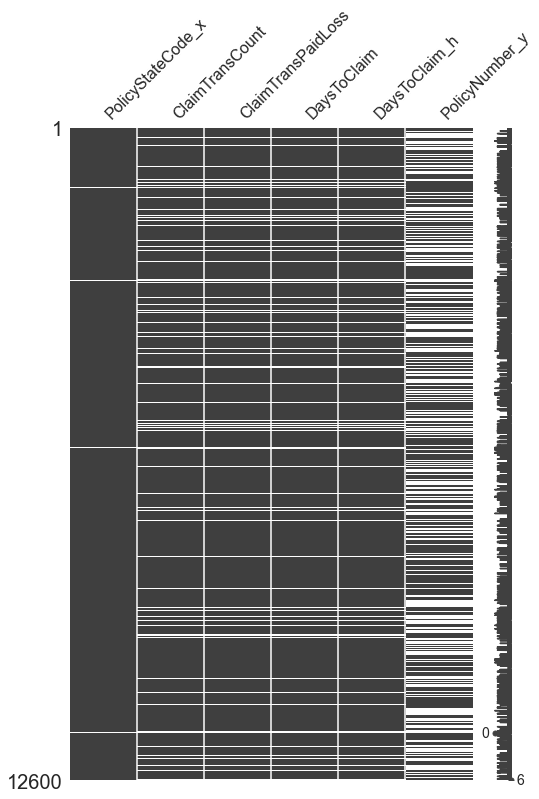

In [12]:
#finding the missing values
msno.matrix(df[df.columns[df.isnull().any()]], figsize=(8, 12))
plt.show()

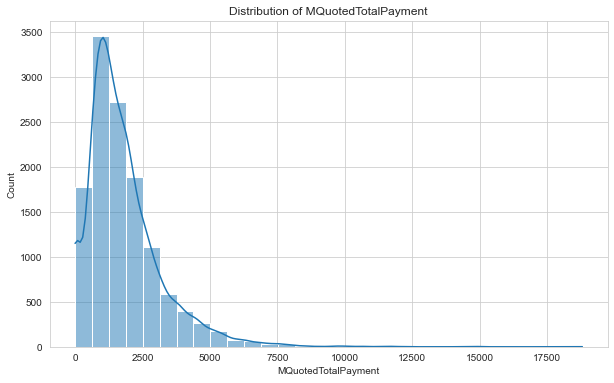

In [13]:
#distribution of MQuotedTotalPayment variable
plt.figure(figsize=(10, 6))
sns.histplot(df['MQuotedTotalPayment'], bins=30, kde=True)
plt.title("Distribution of MQuotedTotalPayment")
plt.xlabel("MQuotedTotalPayment")
plt.show()

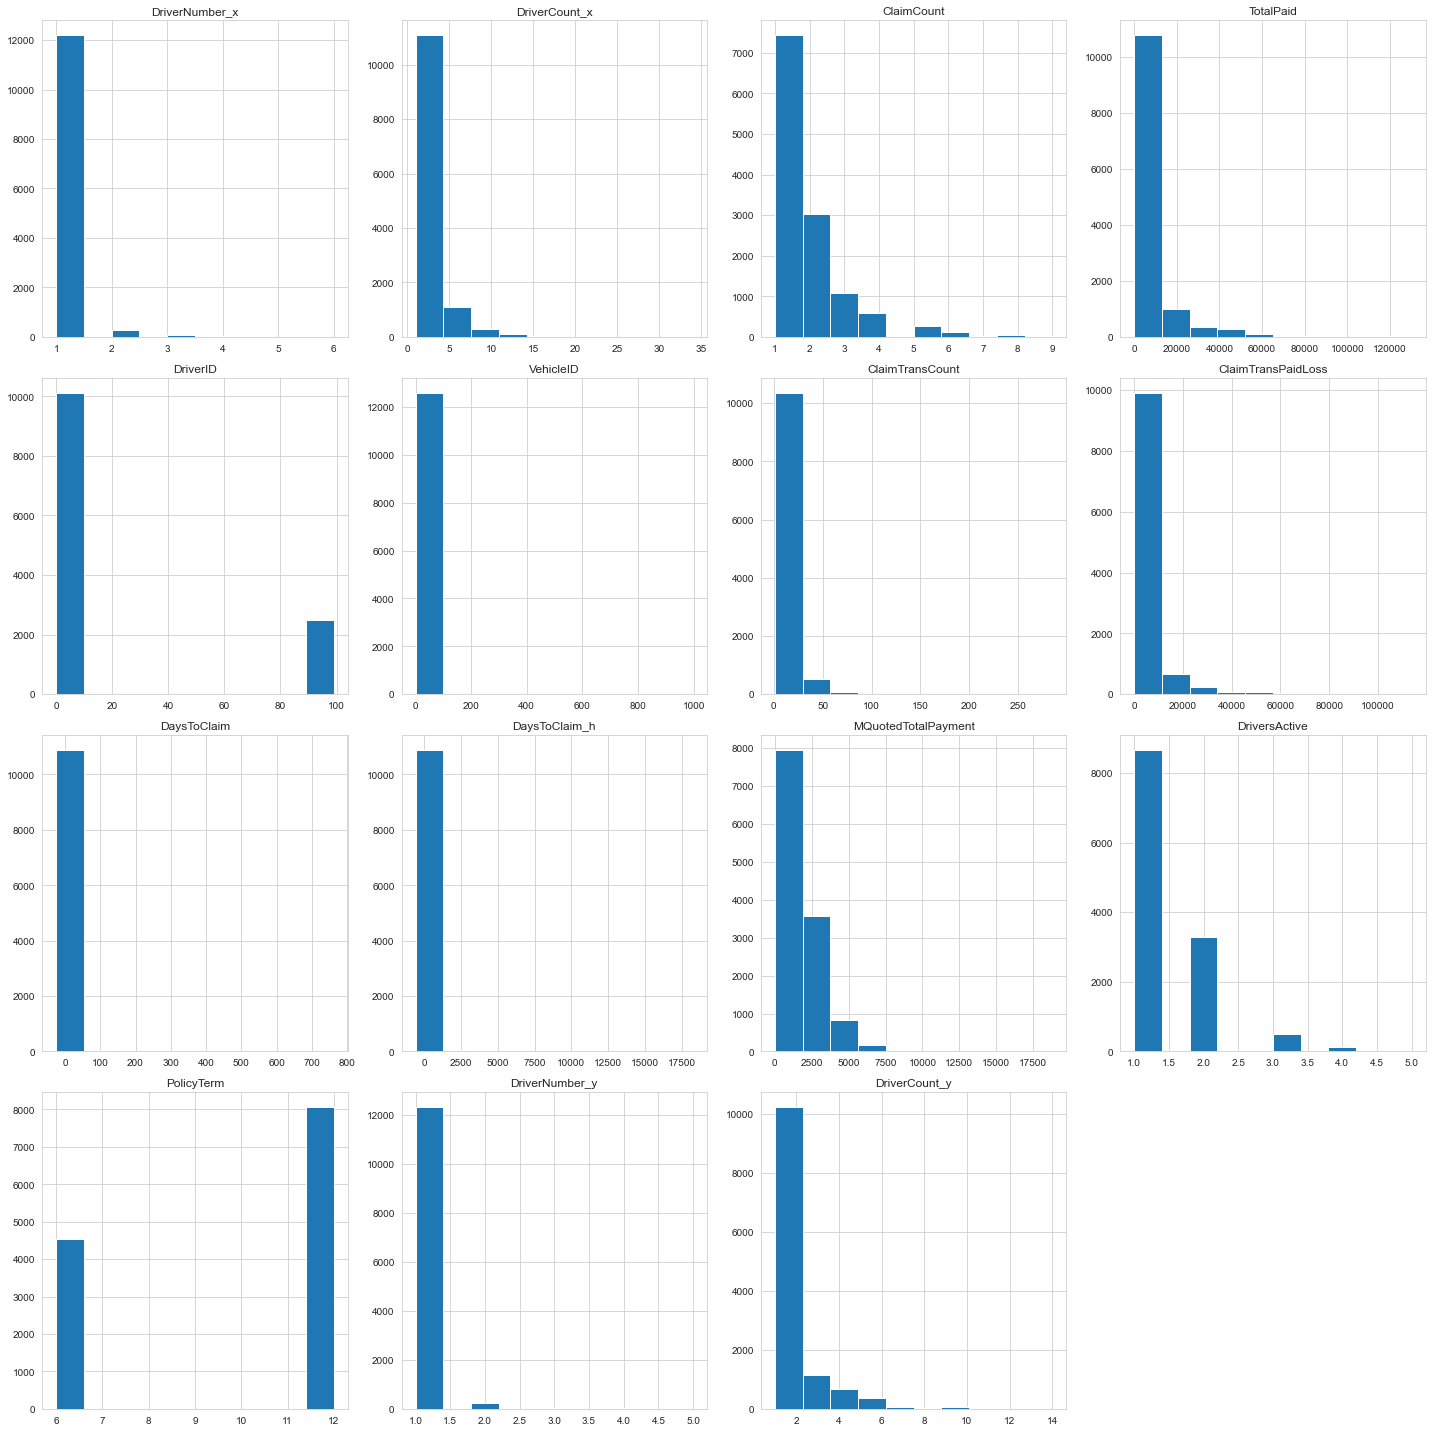

In [14]:
#creating histograms with numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64'])
numerical_columns.hist(figsize=(20, 20))
plt.tight_layout()
plt.show()

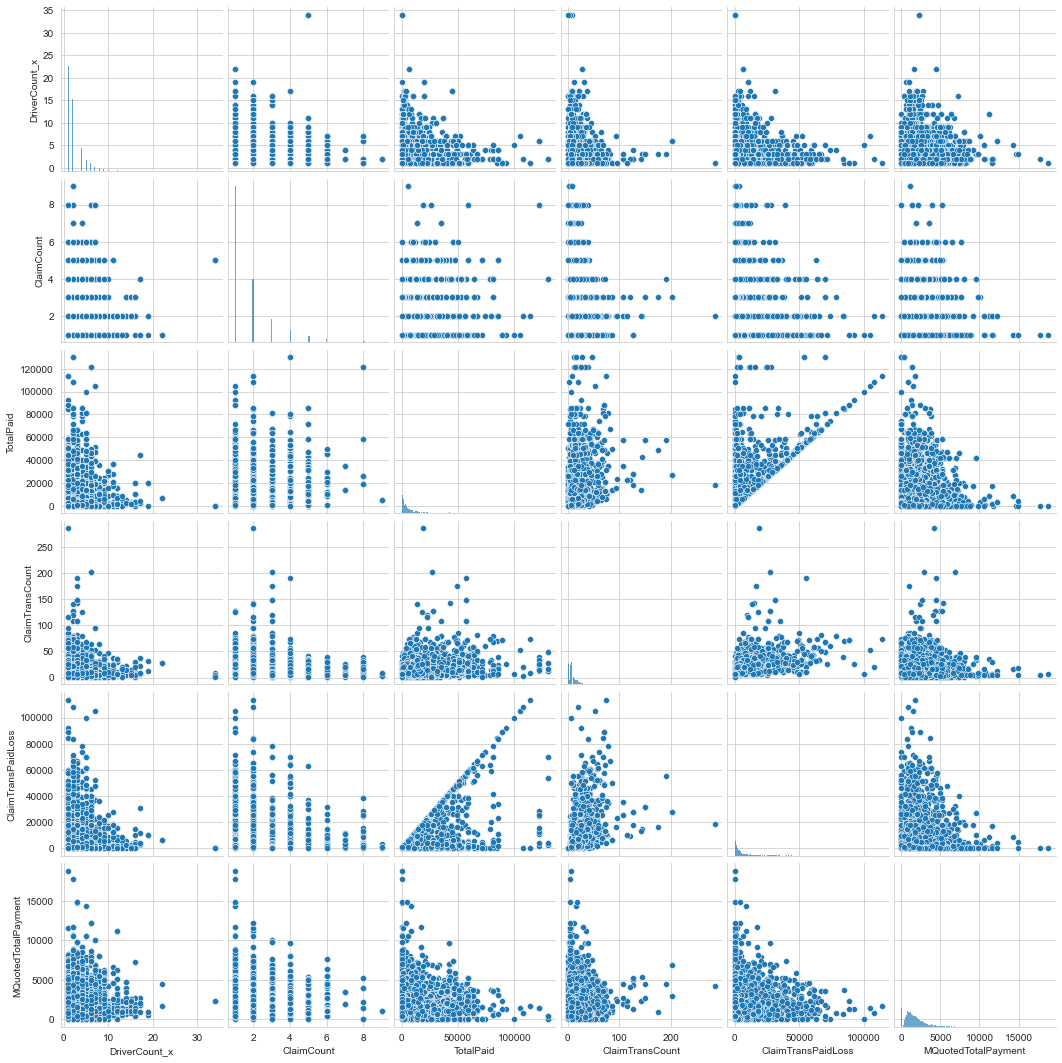

In [15]:
#creating pairplots with important variables
sns.pairplot(df[['DriverCount_x', 'ClaimCount', 'TotalPaid', 'ClaimTransCount', 'ClaimTransPaidLoss', 'MQuotedTotalPayment']])
plt.show()

6 variables ended up having missing values, so those will be handled in the next step. Can see a couple linear relationships in the pairplots. 

### Data Preprocessing

In this step, I'm filling missing values, converting categorical variables to numerical, and changing the datatype for the variables with dates.

In [16]:
#fill missing values
#fill PolicyStateCode_x with PolicyStateCode_y
df['PolicyStateCode_x'].fillna(df['PolicyStateCode_y'], inplace=True)

#fill ClaimTransCount with mean
mean_claim_trans_count = df['ClaimTransCount'].mean()
df['ClaimTransCount'].fillna(mean_claim_trans_count, inplace=True)

#fill ClaimTransPaidLoss with mean
mean_claim_trans_paid_loss = df['ClaimTransPaidLoss'].mean()
df['ClaimTransPaidLoss'].fillna(mean_claim_trans_paid_loss, inplace=True)

#fill DaysToClaim with mean
mean_days_to_claim = df['DaysToClaim'].mean()
df['DaysToClaim'].fillna(mean_days_to_claim, inplace=True)

#fill DaysToClaim_h with mean
mean_days_to_claim_h = df['DaysToClaim_h'].mean()
df['DaysToClaim_h'].fillna(mean_days_to_claim_h, inplace=True)

#drop PolicyNumber_y
df.drop('PolicyNumber_y', axis=1, inplace=True)

In [17]:
#change categorical variables to numerical (AtFaultDescription, ClaimStatus, ClaimType, CoverageTypeDescription)
dum = ['AtFaultDescription', 'ClaimStatus', 'CoverageTypeDescription']
df = pd.get_dummies(df, columns=dum)

In [18]:
#changing all the date variables to datetime datatype
df['DateOfLoss'] = pd.to_datetime(df['DateOfLoss'])
df['TermEffectiveDate_x'] = pd.to_datetime(df['TermEffectiveDate_x'])
df['QuoteInitiatedTime'] = pd.to_datetime(df['QuoteInitiatedTime'])
df['TermEffectiveDate_y'] = pd.to_datetime(df['TermEffectiveDate_y'])
df['TermExpirationDate'] = pd.to_datetime(df['TermExpirationDate'])

In [19]:
#creating a variable that counts the days between contract start date and date of crash
df['TimeBetweenStartAndCrash'] = (df['DateOfLoss'] - df['TermEffectiveDate_y']).dt.days

I filled all the missing values, mostly with mean. PolicyNumber_y was dropped because it contained so many missing variables. 'AtFaultDescription', 'ClaimStatus', and 'CoverageTypeDescription' were changed from categorical to numerical so we are able to use them in the models. 5 data variables were changed to the datetime datatype.

### Building models

### Regression Models

For the first part of this step, I will separate the data into x and y with target variable 'MQuotedTotalPayment' for building regression models. I will split into 70/30 training/testing, scale the data, then build Multiple Linear, Lasso, and Ridge Regression models. Then I will calculate RMSE, MAE, MAPE, and R_Squared corresponding to the test data set

#### Prep Data

In [20]:
#separate X and y
X = df.drop(['MQuotedTotalPayment'], axis=1)
y = df['MQuotedTotalPayment']

#not including datetime and categorical columns for these models without dropping from df
date_columns = X.select_dtypes(include='datetime64').columns
categorical_columns = X.select_dtypes(include='object').columns

#exclude datetime and categorical columns
X = X.drop(columns=date_columns.union(categorical_columns))

#split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#checking for infinity values
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train.fillna(X_train.mean(), inplace=True)

X_test.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

#standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Multiple Linear Regression

In [21]:
#feature selection using SelectKBest
k_best = 5
selector = SelectKBest(f_regression, k=k_best)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

#get selected feature names
selected_feature_names = X.columns[selector.get_support()]

#fit the model with selected features
X_train_selected = sm.add_constant(X_train_selected)
model = sm.OLS(y_train, X_train_selected).fit()
print(model.summary())

#predict
X_test_selected = sm.add_constant(X_test_selected)
y_pred = model.predict(X_test_selected)

#display the equation
equation = f"Y = {model.params['const']:.4f}"
for feature, coef in zip(selected_feature_names, model.params[1:]):
    equation += f" + {coef:.4f} * {feature}"

print("\nEquation:")
print(equation)

                             OLS Regression Results                            
Dep. Variable:     MQuotedTotalPayment   R-squared:                       0.371
Model:                             OLS   Adj. R-squared:                  0.371
Method:                  Least Squares   F-statistic:                     1040.
Date:                 Sat, 09 Dec 2023   Prob (F-statistic):               0.00
Time:                         19:51:09   Log-Likelihood:                -74474.
No. Observations:                 8820   AIC:                         1.490e+05
Df Residuals:                     8814   BIC:                         1.490e+05
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1796.9158     11.974    150.06

In [22]:
#could also remove CoverageTypeDescription_Liability Only because p-val is 0.260
selected_features = ['DriversActive', 'PolicyTerm', 'DriverCount_y', 'CoverageTypeDescription_Full Coverage']

#filter
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

#fit with selected variables
X_train_selected = sm.add_constant(X_train_selected)
model = sm.OLS(y_train, X_train_selected).fit()
print(model.summary())

#predictions
X_test_selected = sm.add_constant(X_test_selected)
y_pred_multi = model.predict(X_test_selected)

#display the equation
equation = f"Y = {model.params['const']:.4f}"
for feature, coef in zip(selected_features, model.params[1:]):
    equation += f" + {coef:.4f} * {feature}"

print("\nEquation:")
print(equation)

                             OLS Regression Results                            
Dep. Variable:     MQuotedTotalPayment   R-squared:                       0.371
Model:                             OLS   Adj. R-squared:                  0.371
Method:                  Least Squares   F-statistic:                     1300.
Date:                 Sat, 09 Dec 2023   Prob (F-statistic):               0.00
Time:                         19:51:09   Log-Likelihood:                -74475.
No. Observations:                 8820   AIC:                         1.490e+05
Df Residuals:                     8815   BIC:                         1.490e+05
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

$$\hat{MQuotedTotalPayment}= -843.1105 + 339.9640DriversActive + 148.1821PolicyTerm + 19.4667DriverCount_y + 1380.1684CoverageTypeDescription_Full Coverage$$

The MQuotedTotalPayment is predicted to be -843.1105 when all predictors are equal to zero. When DriversActive increases by 1 unit, MQuotedTotalPayment increases by 339.9640. When PolicyTerm increases by 1 unit, MQuotedTotalPayment increases by 148.1821 and so on. 

In [23]:
#calc measurements
rmse_multi = np.sqrt(mean_squared_error(y_test, y_pred_multi))
mape_multi = np.mean(np.abs((y_test - y_pred_multi) / y_test))
r2_multi = r2_score(y_test, y_pred_multi) 
mae_multi = mean_absolute_error(y_test, y_pred_multi)
mse = mean_squared_error(y_test, y_pred_multi)

#print measurements
print(f"Root Mean Squared Error (RMSE): {rmse_multi:.4f}")
print(f"Mean Absolute Error (MAE): {mae_multi:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_multi:.4f}")
print(f"R-squared (R^2): {r2_multi:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")

Root Mean Squared Error (RMSE): 1059.9687
Mean Absolute Error (MAE): 758.1874
Mean Absolute Percentage Error (MAPE): inf
R-squared (R^2): 0.4058
Mean Squared Error (MSE): 1123533.7136


Kept getting inf for MAPE, trying to replace y_test with small values instead of zero led to a very large number.

#### Lasso Regression

In [24]:
#define range of alpha values
alphas = np.logspace(-4, 4, 100)

#create model
lasso = Lasso()

#set up parameter grid and use GridSearchCV to find the best alpha
param_grid = {'alpha': alphas}
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)
best_alpha = grid_search.best_params_['alpha']

#fit model with best alpha
lasso_best = Lasso(alpha=best_alpha)
lasso_best.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_best.predict(X_test_scaled)

In [25]:
#calc measurements
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
mape_lasso = np.mean(np.abs((y_test - y_pred_lasso) / y_test))
r2_lasso = r2_score(y_test, y_pred_lasso) 
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

#print measurements
print(f"Root Mean Squared Error (RMSE): {rmse_lasso:.4f}")
print(f"Mean Absolute Error (MAE): {mae_lasso:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_lasso:.4f}")
print(f"R-squared (R^2): {r2_lasso:.4f}")

Root Mean Squared Error (RMSE): 1051.3937
Mean Absolute Error (MAE): 752.0539
Mean Absolute Percentage Error (MAPE): inf
R-squared (R^2): 0.4154


#### Ridge Regression

In [26]:
#define range of alpha values
alphas = np.logspace(-4, 4, 100)

#create model
ridge = Ridge()

#set up parameter grid and use GridSearchCV to find the best alpha
param_grid = {'alpha': alphas}
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)
best_alpha = grid_search.best_params_['alpha']

#fit model with best alpha
ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_best.predict(X_test_scaled)

In [27]:
#calc measurements
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
mape_ridge = np.mean(np.abs((y_test - y_pred_ridge) / y_test))
r2_ridge = r2_score(y_test, y_pred_ridge) 
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

#print measurements
print(f"Root Mean Squared Error (RMSE): {rmse_ridge:.4f}")
print(f"Mean Absolute Error (MAE): {mae_ridge:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_ridge:.4f}")
print(f"R-squared (R^2): {r2_ridge:.4f}")

Root Mean Squared Error (RMSE): 1050.9353
Mean Absolute Error (MAE): 753.4568
Mean Absolute Percentage Error (MAPE): inf
R-squared (R^2): 0.4159


### Comparing Models and Visualizing (Regression)

I will compare my results from the models implemented, explain the results from the best model, and report the most important variables. I will also create some visualizations to compare the models.

In [28]:
#function to print all measurements neatly
def print_model_metrics(model_name, rmse, mae, mape, r2):
    print(f"{model_name} Measurements:")
    print("Root Mean Squared Error (RMSE):", rmse)
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Absolute Percentage Error (MAPE):", mape)
    print("R-squared (R^2):", r2)
    print()

#print measurements
print_model_metrics("Multiple Linear Regression", rmse_multi, mae_multi, mape_multi, r2_multi)
print_model_metrics("Lasso", rmse_lasso, mae_lasso, mape_lasso, r2_lasso)
print_model_metrics("Ridge", rmse_ridge, mae_ridge, mape_ridge, r2_ridge)

Multiple Linear Regression Measurements:
Root Mean Squared Error (RMSE): 1059.9687323672238
Mean Absolute Error (MAE): 758.1874039303923
Mean Absolute Percentage Error (MAPE): inf
R-squared (R^2): 0.4058465130040907

Lasso Measurements:
Root Mean Squared Error (RMSE): 1051.3937094278638
Mean Absolute Error (MAE): 752.0539187396852
Mean Absolute Percentage Error (MAPE): inf
R-squared (R^2): 0.41542089220056166

Ridge Measurements:
Root Mean Squared Error (RMSE): 1050.9352894751198
Mean Absolute Error (MAE): 753.456815252421
Mean Absolute Percentage Error (MAPE): inf
R-squared (R^2): 0.4159305477230718



All three models have similar RMSE and MAE values meaning they perform about the same for predicting the target variable. MAPE is inf for all models, meaning there's instances where the true values are zero meaning it's dividing by zero in the calculation. The R-squared values for all the models are around 0.41, meaning the models explain around 41% of the variance in the target variable. Lasso and Ridge were slightly better, but they are very similar.

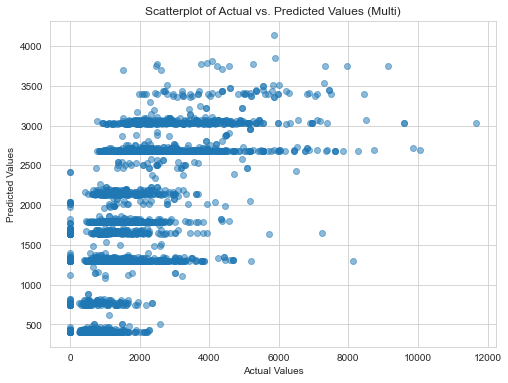

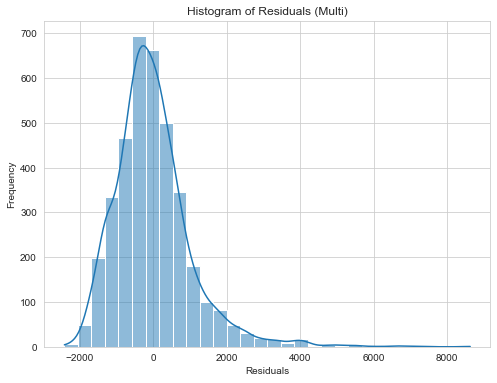

In [29]:
#had to convert to numeric and drop missing values before I could get this to work
y_test_numeric = pd.to_numeric(y_test, errors='coerce')
y_pred_multi_numeric = pd.to_numeric(y_pred_multi, errors='coerce')
y_test_numeric = y_test_numeric.dropna()
y_pred_multi_numeric = y_pred_multi_numeric.dropna()

#calc resid
residuals = y_test_numeric - y_pred_multi_numeric

#scatterplot of predicted vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test_numeric, y_pred_multi_numeric, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatterplot of Actual vs. Predicted Values (Multi)")
plt.show()

#histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals (Multi)")
plt.show()

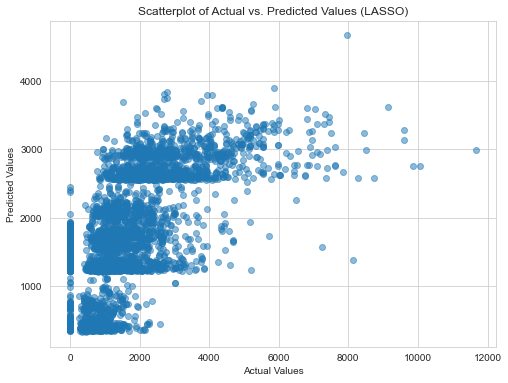

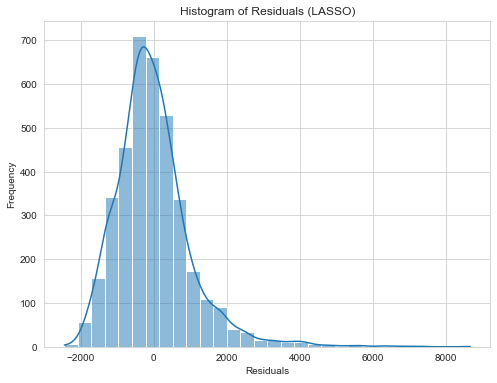

In [30]:
#calc resid
residuals = y_test - y_pred_lasso

#scatterplot of predicted vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lasso, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatterplot of Actual vs. Predicted Values (LASSO)")
plt.show()

#histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals (LASSO)")
plt.show()

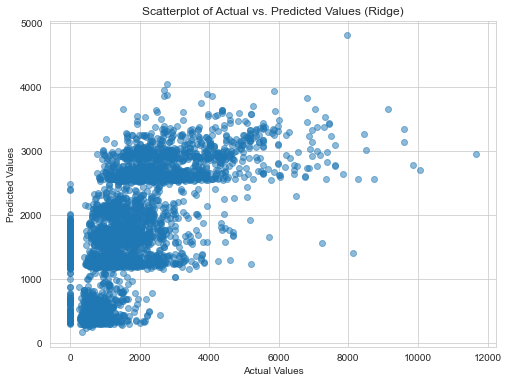

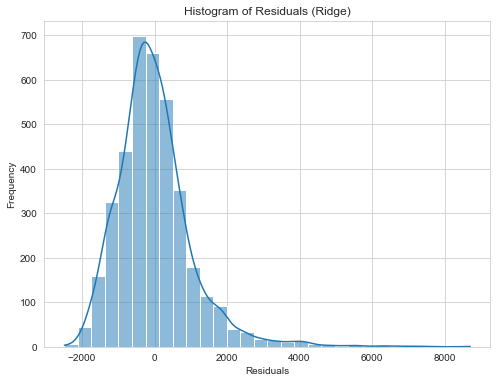

In [31]:
#calc resid
residuals = y_test - y_pred_ridge

#scatterplot of predicted vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatterplot of Actual vs. Predicted Values (Ridge)")
plt.show()

#histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals (Ridge)")
plt.show()

### Classification Models

For the next step, I will be building classification models for predicting policy risk. I will do this by creating a target variable that I think will help to predict a risk for the company. I will build a Logistic Regression model, Decision Tree classifier, and Random Forest classifier. Then, I will report the confusion matrix, Accuracy, Sensitivity, Specificity and ROC curve corresponding to the test data set.

#### Creating Target Variable

In [32]:
#func to create new target variable for classification models
def policy_risk_func(row):

    #relevant variables
    claim_count = row['ClaimCount']
    time_between_start_and_crash = row['TimeBetweenStartAndCrash']
    at_fault_insured = row['AtFaultDescription_Insured at fault']
    at_fault_other_party = row['AtFaultDescription_Other party at fault']

    #define criteria for policy risk
    
    #if the insured are at fault, time between the contract starts and crash is less than 30 days, or
    #they have made 4 and above claims, mark as high risk
    
    #if they have made 1 claim, its been greater than 180 days between contract start and crash or
    #if it was the other parties fault for the crash, mark as low risk
    
    #mark everything else as moderate
    
    if (4 <= claim_count <= 9) or (time_between_start_and_crash <= 30) or at_fault_insured:
        return 'High Risk'
    elif at_fault_other_party or (time_between_start_and_crash > 180) or (claim_count == 1):
        return 'Low Risk'
    else:
        return 'Moderate Risk'

#create variable based on criteria above
df['policy_risk'] = df.apply(policy_risk_func, axis=1)

#check the distribution of policy_risk
print(df['policy_risk'].value_counts())

High Risk        8365
Low Risk         3928
Moderate Risk     307
Name: policy_risk, dtype: int64


#### Prep Data

In [33]:
#separating x and y with policy_risk as target variable
X = df.drop(['policy_risk'], axis=1)
y = df['policy_risk']

#again, not including datetime and categorical columns
date_columns = X.select_dtypes(include='datetime64').columns
categorical_columns = X.select_dtypes(include='object').columns

#exclude datetime and categorical columns
X = X.drop(columns=date_columns.union(categorical_columns))

#split into 70/30 training/testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Logistic Regression

In [34]:
'''
I tried to optimize the model like this:
    
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'class_weight': [None, 'balanced', {0: 1, 1: 2}],
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga']
}

logistic_grid = LogisticRegression(random_state=42, max_iter=1000)

grid_search = GridSearchCV(logistic_grid, param_grid, cv=10, scoring='accuracy')

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_

print("Best Parameters: ", best_params)

#replace with best params
logistic = LogisticRegression(
    C=best_params['C'],
    penalty=best_params['penalty'],
    class_weight=best_params['class_weight'],
    solver=best_params['solver'],
    random_state=42
)

logistic.fit(X_train_scaled, y_train)

but my computer just would not run it
'''

'\nI tried to optimize the model like this:\n    \nparam_grid = {\n    \'C\': [0.001, 0.01, 0.1, 1, 10, 100],\n    \'penalty\': [\'l2\'],\n    \'class_weight\': [None, \'balanced\', {0: 1, 1: 2}],\n    \'solver\': [\'liblinear\', \'lbfgs\', \'newton-cg\', \'sag\', \'saga\']\n}\n\nlogistic_grid = LogisticRegression(random_state=42, max_iter=1000)\n\ngrid_search = GridSearchCV(logistic_grid, param_grid, cv=10, scoring=\'accuracy\')\n\ngrid_search.fit(X_train_scaled, y_train)\n\nbest_params = grid_search.best_params_\n\nprint("Best Parameters: ", best_params)\n\n#replace with best params\nlogistic = LogisticRegression(\n    C=best_params[\'C\'],\n    penalty=best_params[\'penalty\'],\n    class_weight=best_params[\'class_weight\'],\n    solver=best_params[\'solver\'],\n    random_state=42\n)\n\nlogistic.fit(X_train_scaled, y_train)\n\nbut my computer just would not run it\n'

In [35]:
#initial model
logistic_model = LogisticRegression(random_state=42, C=0.001, class_weight = None, penalty = 'l2', solver = 'liblinear')

#fit the model to the training data
logistic_model.fit(X_train_scaled, y_train)

#make prediction
y_pred_logistic = logistic_model.predict(X_test_scaled)

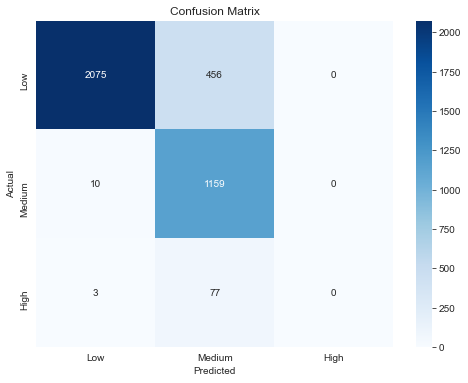

Accuracy: 0.8556
Sensitivity: 0.9914
Specificity: 0.8198


In [36]:
#calc measurements 

#confusion matrix
class_labels = ["Low", "Medium", "High"]

conf_matrix_log = confusion_matrix(y_test, y_pred_logistic)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_log, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#calculate accuracy using y_test
accuracy_log = accuracy_score(y_test, y_pred_logistic)

#calculate sensitivity and specificity
true_negative = conf_matrix_log[0, 0]
false_positive = conf_matrix_log[0, 1]
false_negative = conf_matrix_log[1, 0]
true_positive = conf_matrix_log[1, 1]

#calculate sensitivity and specificity
sensitivity_log = true_positive / (true_positive + false_negative)
specificity_log = true_negative / (true_negative + false_positive)

#print scores
print(f"Accuracy: {accuracy_log:.4f}")
print(f"Sensitivity: {sensitivity_log:.4f}")
print(f"Specificity: {specificity_log:.4f}")


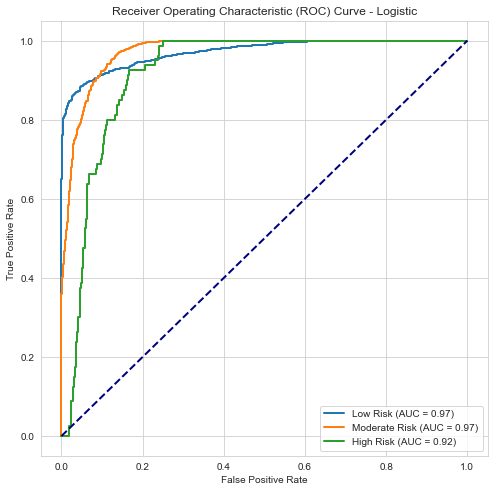

In [37]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, roc_auc_score

#binarize
y_test_bin = label_binarize(y_test, classes=logistic_model.classes_)

#predicted probabilities
y_prob_logistic = logistic_model.predict_proba(X_test_scaled)

#calculate ROC-AUC for each class
n_classes = len(logistic_model.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob_logistic[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_prob_logistic[:, i])

#plot ROC curves for each class
plt.figure(figsize=(8, 8))
for i in range(n_classes):
    risk_level = 'Low' if i == 0 else 'Moderate' if i == 1 else 'High'
    plt.plot(fpr[i], tpr[i], lw=2, label=f'{risk_level} Risk (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic')
plt.legend(loc='lower right')
plt.show()

#### Decision Tree

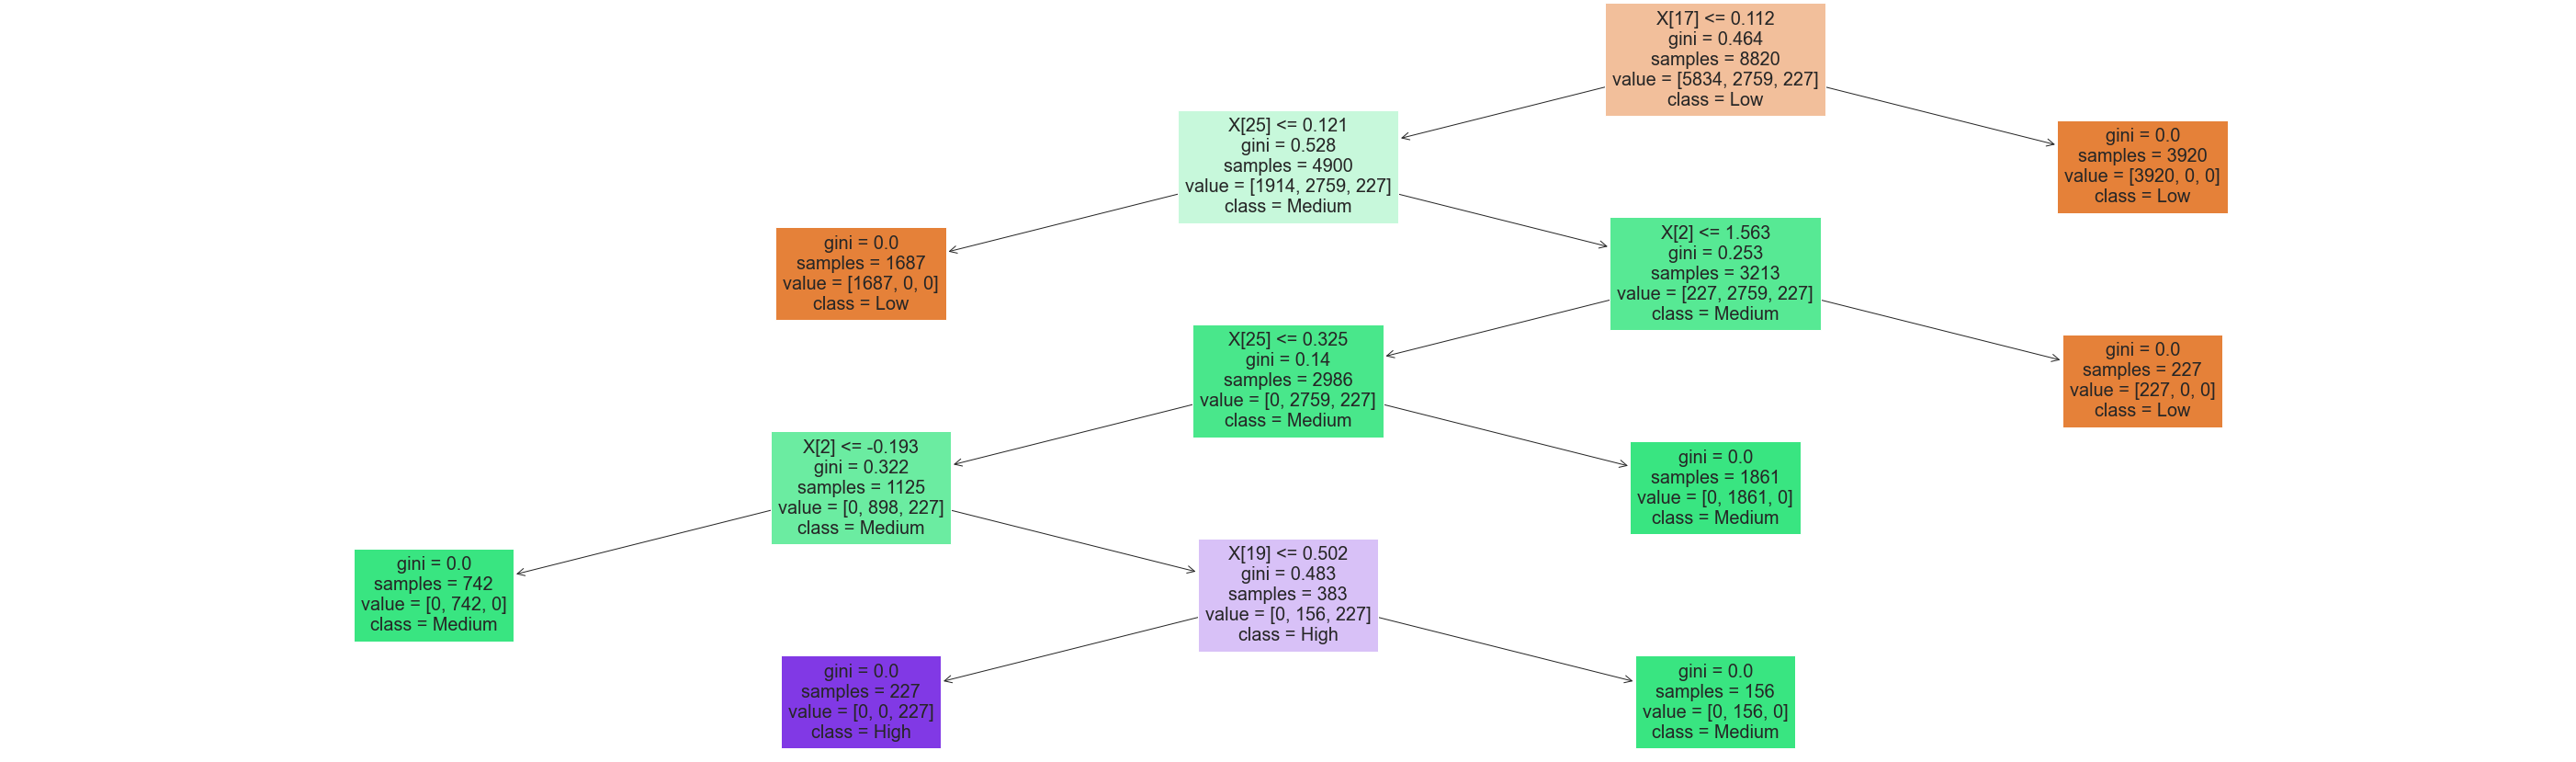

In [38]:
from sklearn.tree import plot_tree

#initialize model
tree_model = DecisionTreeClassifier(random_state=42)

#fit model
tree_model.fit(X_train_scaled, y_train)

#predict
y_pred_tree = tree_model.predict(X_test_scaled)

#plot the tree
plt.figure(figsize=(50, 15))
plot_tree(tree_model, class_names=['Low', 'Medium', 'High'], filled=True)
plt.show()

In [39]:
from sklearn.tree import export_text

#printing the tree rules text to make it easier to read
feature_names = X_train.columns.tolist()
tree_rules = export_text(tree_model, feature_names=feature_names, spacing=3, decimals=2)

print("Decision Tree Rules:")
print(tree_rules)

Decision Tree Rules:
|--- AtFaultDescription_Insured at fault <= 0.11
|   |--- TimeBetweenStartAndCrash <= 0.12
|   |   |--- class: High Risk
|   |--- TimeBetweenStartAndCrash >  0.12
|   |   |--- ClaimCount <= 1.56
|   |   |   |--- TimeBetweenStartAndCrash <= 0.32
|   |   |   |   |--- ClaimCount <= -0.19
|   |   |   |   |   |--- class: Low Risk
|   |   |   |   |--- ClaimCount >  -0.19
|   |   |   |   |   |--- AtFaultDescription_Other party at fault <= 0.50
|   |   |   |   |   |   |--- class: Moderate Risk
|   |   |   |   |   |--- AtFaultDescription_Other party at fault >  0.50
|   |   |   |   |   |   |--- class: Low Risk
|   |   |   |--- TimeBetweenStartAndCrash >  0.32
|   |   |   |   |--- class: Low Risk
|   |   |--- ClaimCount >  1.56
|   |   |   |--- class: High Risk
|--- AtFaultDescription_Insured at fault >  0.11
|   |--- class: High Risk



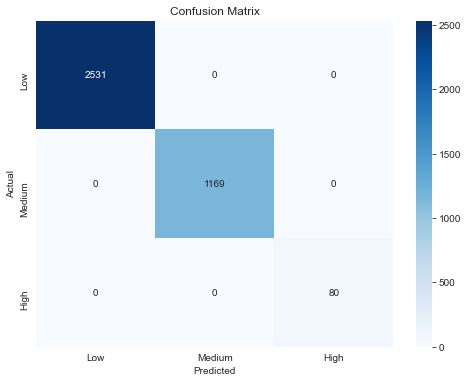

Accuracy: 1.0000
Sensitivity: 1.0000
Specificity: 1.0000


In [40]:
#calc measurements 

conf_matrix_dt = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#calculate accuracy using y_test
accuracy_dt = accuracy_score(y_test, y_pred_tree)

#calculate sensitivity and specificity
true_negative = conf_matrix_dt[0, 0]
false_positive = conf_matrix_dt[0, 1]
false_negative = conf_matrix_dt[1, 0]
true_positive = conf_matrix_dt[1, 1]

#calculate sensitivity and specificity
sensitivity_dt = true_positive / (true_positive + false_negative)
specificity_dt = true_negative / (true_negative + false_positive)

#print scores
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Sensitivity: {sensitivity_dt:.4f}")
print(f"Specificity: {specificity_dt:.4f}")

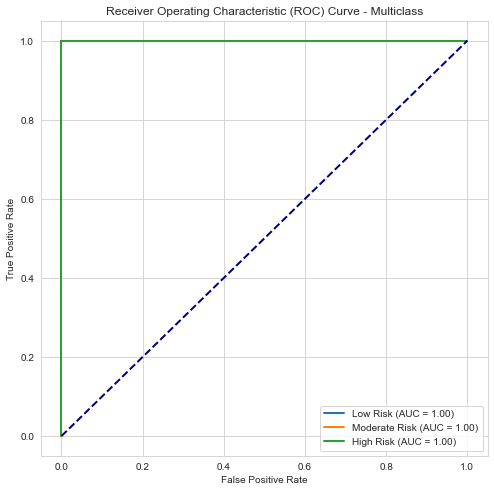

In [41]:
#predicted probabilities for each class
y_prob_tree = tree_model.predict_proba(X_test_scaled)

#calc ROC-AUC for each class
n_classes = len(tree_model.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob_tree[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_prob_tree[:, i])

#plot ROC curves for each class
plt.figure(figsize=(8, 8))
for i in range(n_classes):
    risk_level = 'Low' if i == 0 else 'Moderate' if i == 1 else 'High'
    plt.plot(fpr[i], tpr[i], lw=2, label=f'{risk_level} Risk (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Multiclass')
plt.legend(loc='lower right')
plt.show()

#### Random Forest

In [42]:
'''
this also would not run on my computer 

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_scaled, y_train)
best_rf_model = grid_search.best_estimator_
'''

"\nthis also would not run on my computer \n\nparam_grid = {\n    'n_estimators': [50, 100, 200],\n    'max_depth': [None, 10, 20],\n    'min_samples_split': [2, 5, 10],\n    'min_samples_leaf': [1, 2, 4]\n}\n\nrf_model = RandomForestClassifier(random_state=42)\n\ngrid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')\n\ngrid_search.fit(X_train_scaled, y_train)\nbest_rf_model = grid_search.best_estimator_\n"

In [43]:
#initialize model
rf_model = RandomForestClassifier(random_state=42)

#fit model
rf_model.fit(X_train, y_train)

#predict
y_pred_rf = rf_model.predict(X_test)

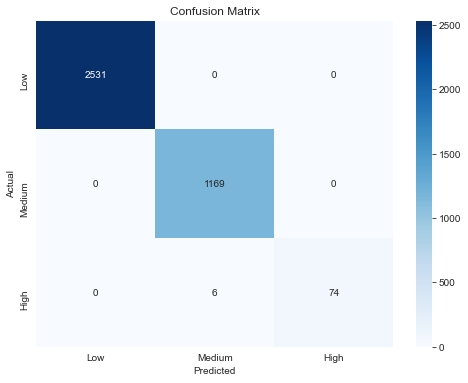

Accuracy: 0.9984
Sensitivity: 1.0000
Specificity: 1.0000


In [44]:
#calc measurements 

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#calculate accuracy using y_test
accuracy_rf = accuracy_score(y_test, y_pred_rf)

#calculate sensitivity and specificity
true_negative = conf_matrix_rf[0, 0]
false_positive = conf_matrix_rf[0, 1]
false_negative = conf_matrix_rf[1, 0]
true_positive = conf_matrix_rf[1, 1]

#calculate sensitivity and specificity
sensitivity_rf = true_positive / (true_positive + false_negative)
specificity_rf = true_negative / (true_negative + false_positive)

#print scores
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Sensitivity: {sensitivity_rf:.4f}")
print(f"Specificity: {specificity_rf:.4f}")

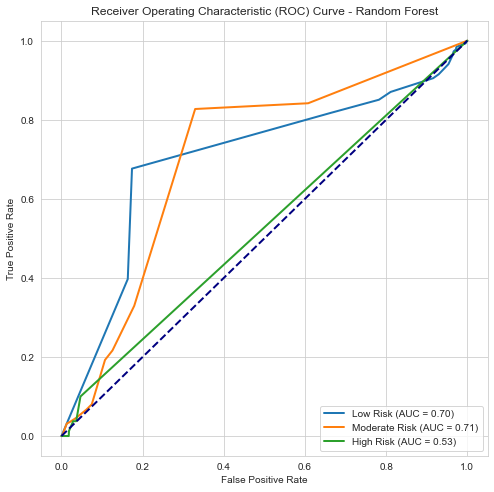

In [45]:
#get predicted probabilities for each class
y_prob_rf = rf_model.predict_proba(X_test_scaled)

#plot ROC curves for each class
plt.figure(figsize=(8, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob_rf[:, i])
    roc_auc = auc(fpr, tpr)
    risk_level = 'Low' if i == 0 else 'Moderate' if i == 1 else 'High'
    plt.plot(fpr, tpr, lw=2, label=f'{risk_level} Risk (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()

If I could have gotten the parameters for the logistic model and random forest classifier to run, I think that would have improved the scores. Based on the measurements, it looks like the decision tree is the best model for predicting the risk.

### Comparing Models and Visualizing (Classification)

I will compare my results from the models implemented, explain the results from the best model, and report the most important variables. I will also create some visualizations to compare the models.

In [46]:
#printing the measurements together
#logistic regression
print("Logistic Regression:")
print(f"  Accuracy:    {accuracy_log:.4f}")
print(f"  Sensitivity: {sensitivity_log:.4f}")
print(f"  Specificity: {specificity_log:.4f}\n")

#decision tree
print("Decision Tree:")
print(f"  Accuracy:    {accuracy_dt:.4f}")
print(f"  Sensitivity: {sensitivity_dt:.4f}")
print(f"  Specificity: {specificity_dt:.4f}\n")

#random forest
print("Random Forest:")
print(f"  Accuracy:    {accuracy_rf:.4f}")
print(f"  Sensitivity: {sensitivity_rf:.4f}")
print(f"  Specificity: {specificity_rf:.4f}")

Logistic Regression:
  Accuracy:    0.8556
  Sensitivity: 0.9914
  Specificity: 0.8198

Decision Tree:
  Accuracy:    1.0000
  Sensitivity: 1.0000
  Specificity: 1.0000

Random Forest:
  Accuracy:    0.9984
  Sensitivity: 1.0000
  Specificity: 1.0000


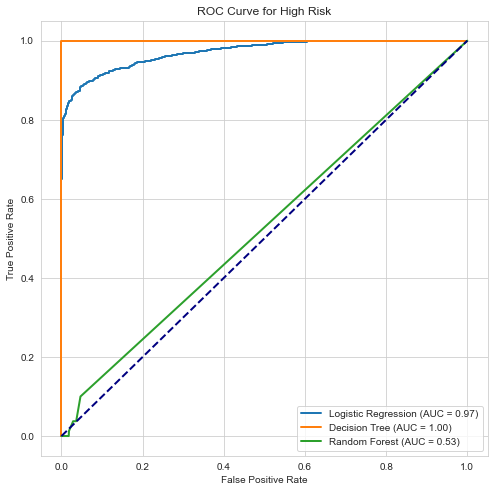

In [47]:
#plotting the high risk ROC curve for each model
y_probs = [y_prob_logistic, y_prob_tree, y_prob_rf]
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']

plt.figure(figsize=(8, 8))
for i, model in enumerate(models):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probs[i][:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{model} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for High Risk')
plt.legend(loc='lower right')
plt.show()

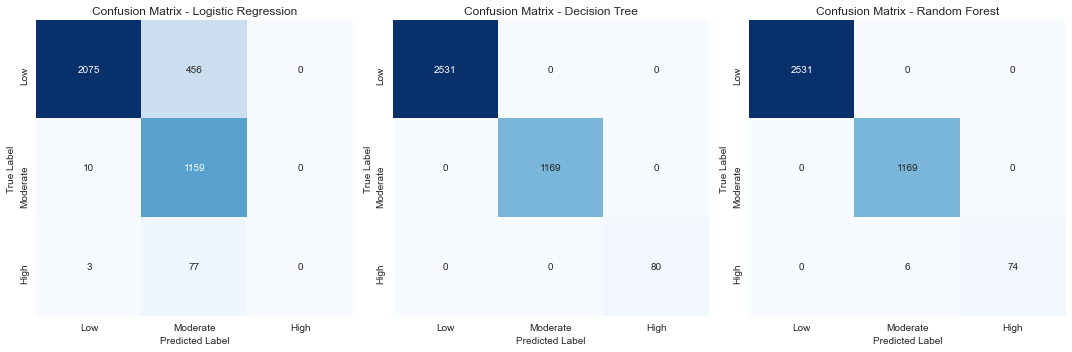

In [48]:
#printing all the confusion matricies
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
predictions = [y_pred_logistic, y_pred_tree, y_pred_rf]

plt.figure(figsize=(15, 5))
for i, model in enumerate(models, 1):
    plt.subplot(1, 3, i)
    cm = confusion_matrix(y_test, predictions[i-1])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Low', 'Moderate', 'High'], yticklabels=['Low', 'Moderate', 'High'])
    plt.title(f'Confusion Matrix - {model}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

plt.tight_layout()
plt.show()

### Final Summary

**Goals:**

Analyze and learn from the data and inform the management about:
The better way to predict the amount of a quote for insurance and the most important features that helps to determine the quote
The better way to assess risk (because the goal of a company is to make profit)

------------------------------------------------------------------------------------------------------

Loaded and merged the datasets on ‘AbilitecContactID’

### Exploratory Data Analysis: 

Visualized missing data, distribution of MQuotedTotalPayment, histograms with numerical columns, and pairplots with important variables

### Data Preprocessing and Feature Engineering: 

Filled missing values with mean, dropped PolicyNumber_y because it had many missing variables, changed categorical variables to numerical, changed all the date variables to datetime datatype, and created a variable that counts the days between contract start date and date of crash

### Regression models: 

Prepped the data by separating x and y with ‘MQuotedTotalPayment' as the target variable, split the data into 70/30 training/testing sets, and then scaled the data

#### Multiple Linear Regression:

Root Mean Squared Error (RMSE): 1059.9687323672238

Mean Absolute Error (MAE): 758.1874039303923

Mean Absolute Percentage Error (MAPE): inf

R-squared (R^2): 0.4058465130040907

#### Lasso Regression:

Root Mean Squared Error (RMSE): 1051.3937094278638

Mean Absolute Error (MAE): 752.0539187396852

Mean Absolute Percentage Error (MAPE): inf

R-squared (R^2): 0.41542089220056166

#### Ridge Regression:

Root Mean Squared Error (RMSE): 1050.9352894751198

Mean Absolute Error (MAE): 753.456815252421

Mean Absolute Percentage Error (MAPE): inf

R-squared (R^2): 0.4159305477230718

### Comparing Models: 

MAPE is inf for all models, meaning there's instances where the true values are zero meaning it's dividing by zero in the calculation. Lasso and Ridge were slightly better, but they were all very similar.

### Classification models: 

Created a target variable for predicting policy risk - If the insured are at fault, time between the contract starts and crash is less than 30 days, or they have made 4 and above claims, marked as high risk. If they have made 1 claim, been greater than 180 days between contract start and crash, or if it was the other party's fault for the crash, marked as low risk. Everything else marked as moderate. Then I split and scaled the data.

#### Logistic Regression:

Accuracy: 0.8556

Sensitivity: 0.9914

Specificity: 0.8198

#### Decision Tree:

Accuracy: 1.0000

Sensitivity: 1.0000

Specificity: 1.0000

#### Random Forest:

  Accuracy:    0.9984
  
  Sensitivity: 1.0000
  
  Specificity: 1.0000

### Comparing Models: 

Decision tree is the best model for predicting the risk

